# WHO (LIFE EXPECTANCY DATA)

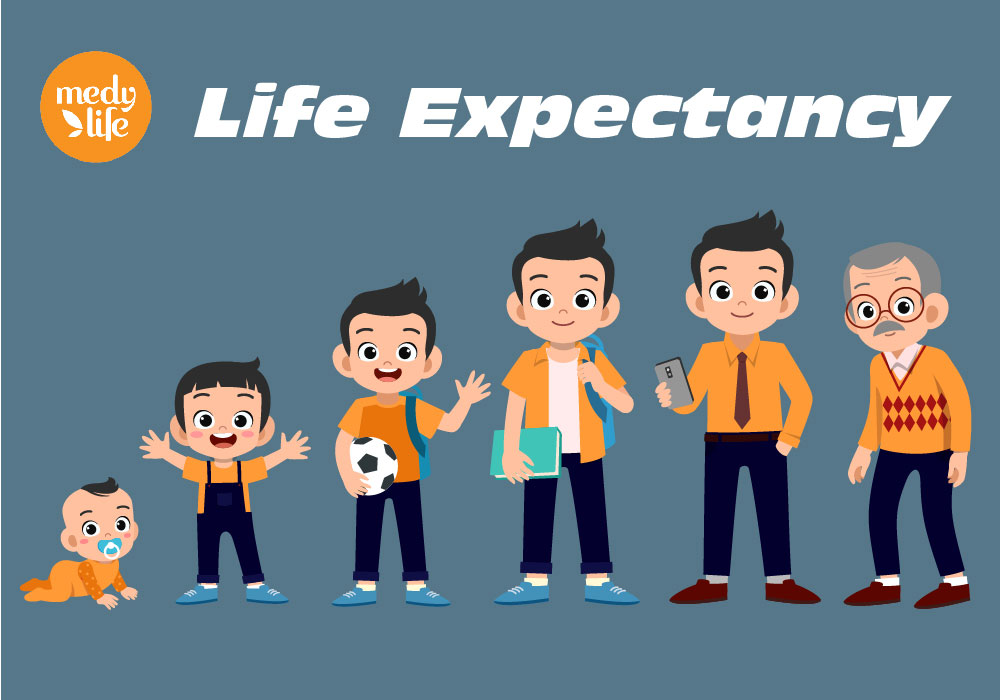

## PROBLEM STATEMENT:

#### Create a model to predict the life expectancy with the given dataset provided

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.so build a model to predict the life expectancy ratio.




## The data-set aims to answer the following key questions:

1) Does various predicting factors which has been chosen initially really affect the Life expectancy?

2) What are the predicting variables actually affecting the life expectancy?

3) Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

4) How does Infant and Adult mortality rates affect life expectancy?

5) Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

6) What is the impact of schooling on the lifespan of humans?

7) Does Life Expectancy have positive or negative relationship with drinking alcohol?

8) Do densely populated countries tend to have lower life expectancy?


9) What is the impact of Immunization coverage on life Expectancy?

## Importing Basic Librabries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

## ReadingThe File

In [3]:
data=pd.read_csv(r'Life Expectancy Data.csv',header = 0,index_col=None, delimiter=' *, *')


In [4]:
data.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

## EXPLORATORY DATA ANALYSIS  & PRE-PROCESSING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [6]:
!pip install missingno

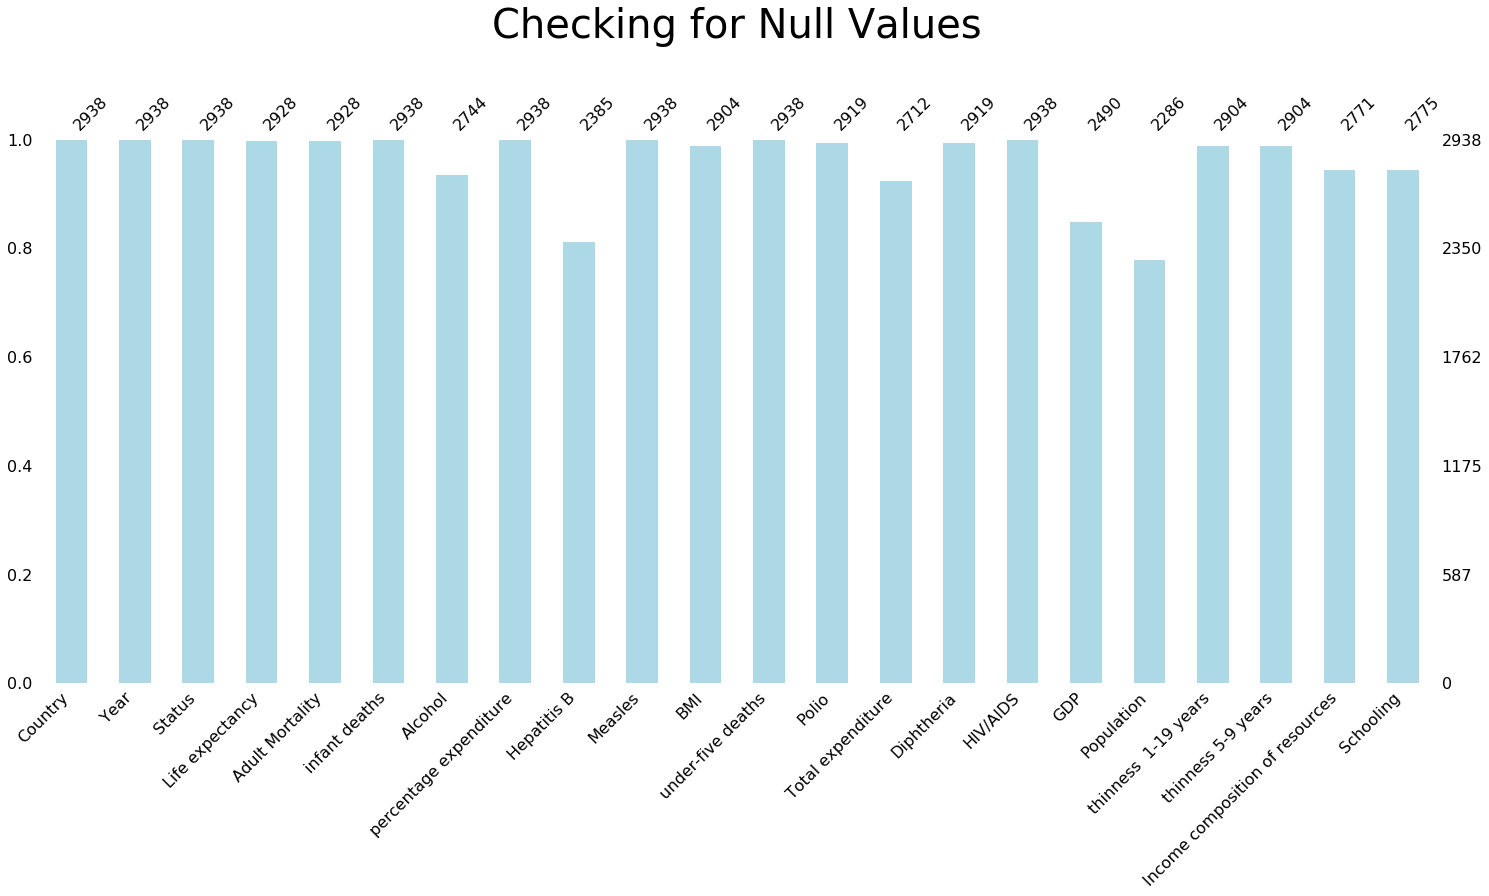

In [7]:
# checking for null values using missingno module

import missingno as msno
msno.bar(data, color = 'Lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()


#### It can be clearly seen that 14 variables are having missing values.

In [8]:
# checking for unique values
for i in data.columns:
    print({i:data[i].unique()})

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgi

#### no unwanted unique value found. so we can proceed replacing missing values

In [9]:
#replace the missing values with mode values
for value in ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
       'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    data[value].fillna(data[value].median(),inplace=True)

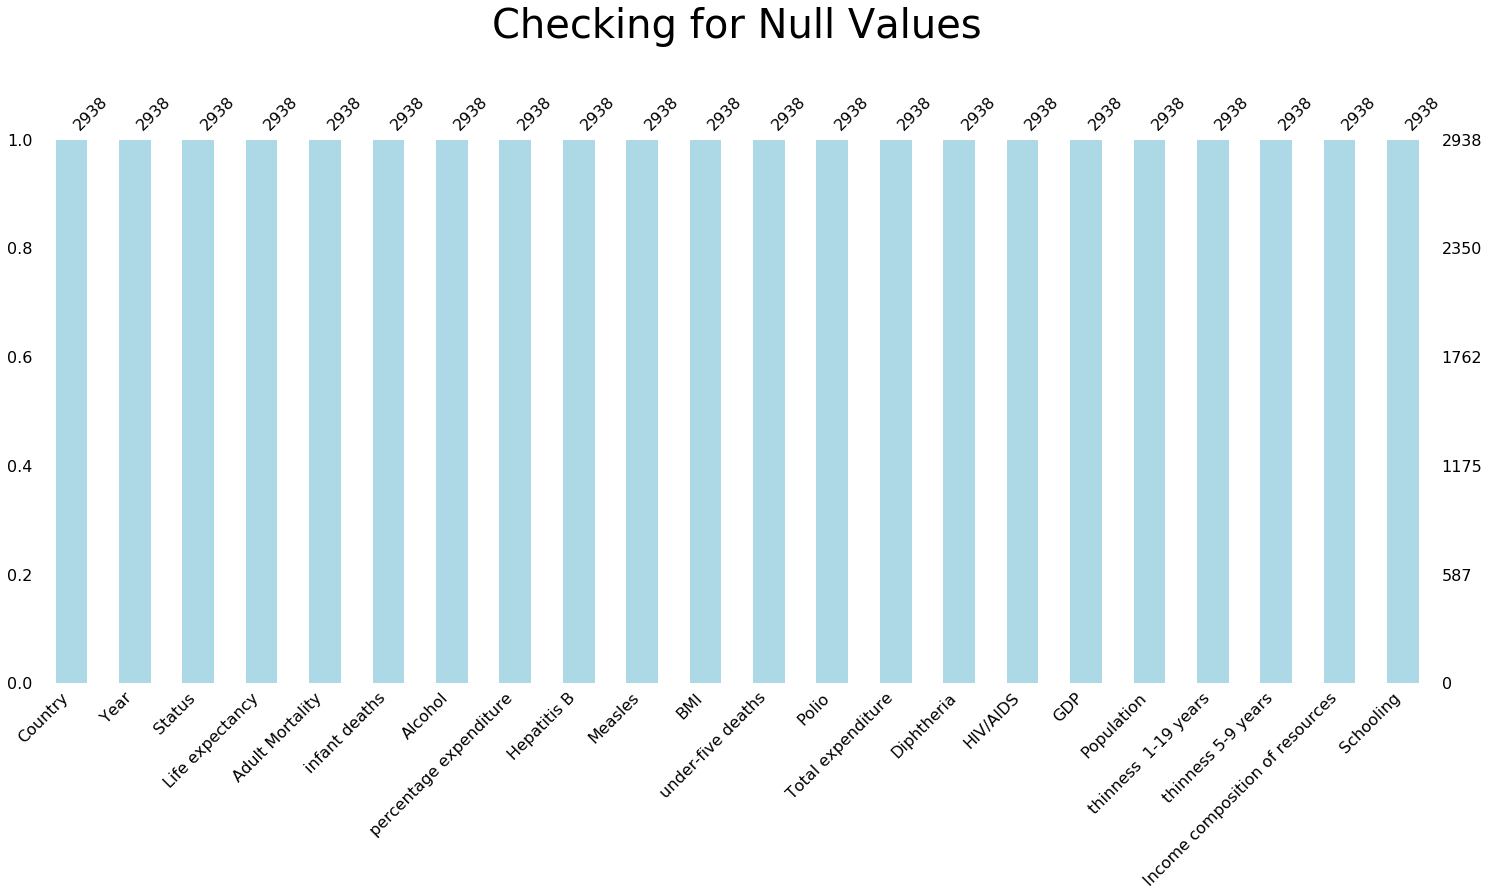

In [10]:
import missingno as msno
msno.bar(data, color = 'Lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()


##### creating a list of variable have categorical values. 

## COUNTRYWISE LIFE EXPECTANCY RATIO OVER YEARS.

In [11]:
fig = px.line((data.sort_values(by = 'Year')), x = 'Year', y = 'Life expectancy',
    animation_frame= 'Country',animation_group='Year',color='Country',
    markers=True,template = 'plotly_dark',title='<b>Country Wise Life Expectancy over the years')
fig.show()

## Plotting a scatter plot to see the life expectancy with different features.

In [12]:
px.scatter(data.sort_values(by = 'Year'),x = 'Life expectancy', y = 'infant deaths', color = 'Country', 
           size = 'Year', template = 'plotly_dark', opacity = 0.6,title = 'Life expectancy VS Infant Death of Countries in Every Year')

Above graph shows that more infant death low life expectancy. e.g India had 1800 infant death in year 2000 and the life expectancy rate in year 2000 was 62.5 on other hand in 2015 infant death decreases to 910 and life expectancy increases to 68.3. So life expectancy is directly propotional to the death of the infant per year.

In [13]:
px.scatter(data.sort_values(by = 'Year'),x = 'Life expectancy', y = 'Adult Mortality', color = 'Country', 
           size = 'Year', template = 'plotly_dark', opacity = 0.6,title = 'Life expectancy VS Adult Mortality of Countries in Every Year')

#### the above graph shows that life expenditure is inversely proportional to adult mortality.

In [14]:
px.scatter(data.sort_values(by = 'Year'),x = 'Life expectancy', y = 'percentage expenditure', color = 'Country', 
           size = 'Year', template = 'plotly_dark', opacity = 0.6,title = 'Life expectancy VS percentage expenditure of Countries in Every Year')

#### the above graph potrays that life expenditure is directing proportional to percentage expenditure. 

In [15]:
px.scatter(data.sort_values(by = 'Year'),x = 'Life expectancy', y = 'Alcohol', color = 'Country', 
           size = 'Year', template = 'plotly_dark', opacity = 0.6,title = 'Life expectancy VS Alcohol consumption of Countries in Every Year')

#### Alcohol consumption have little impact on life expentancy.

In [16]:
px.scatter(data.sort_values(by = 'Year'),x = 'Life expectancy', y = 'GDP', color = 'Country', 
           size = 'Year', template = 'plotly_dark', opacity = 0.6,title = 'Life expectancy VS GDP of Countries in Every Year')

#### GDP show strong positive correalation

In [17]:
px.scatter(data.sort_values(by = 'Year'),x = 'Life expectancy', y = 'Schooling', color = 'Country', 
           size = 'Year', template = 'plotly_dark', opacity = 0.6,title = 'Life expectancy VS Schooling of Countries in Every Year')

#### Schooling also shows strong positive correlation with life expectancy. better schoolig better life decisions better life expectancy.

### Mapping life expectancy on world map

In [18]:
country_data = px.data.gapminder()
country_data.tail()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716

In [19]:
map_fig = px.scatter_geo(country_data,locations = 'iso_alpha', projection = 'orthographic', 
                         opacity = 0.8, color = 'country', hover_name = 'country', 
                         hover_data = ['lifeExp', 'year'],template = 'plotly_dark',title = '<b>Life Expectancy over the World Map')
map_fig.show()

In [20]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname


['Country', 'Status']

In [21]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    """
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    """

In [22]:
data.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0        0  2015       1             65.0            263.0             62   
1        0  2014       1             59.9            271.0             64   
2        0  2013       1             59.9            268.0             66   
3        0  2012       1             59.5            272.0             69   
4        0  2011       1             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

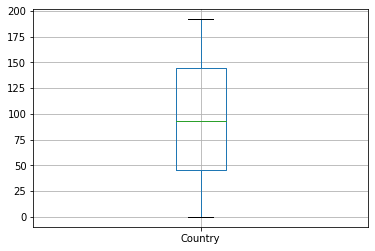

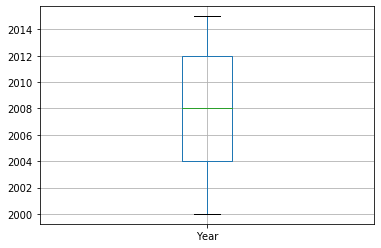

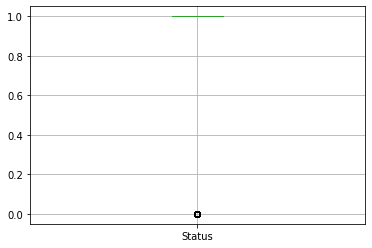

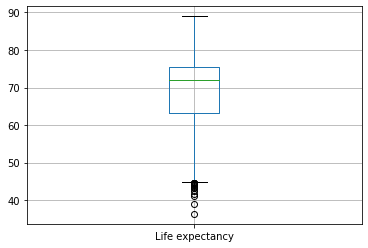

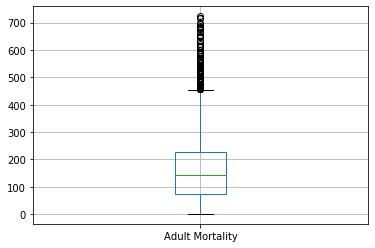

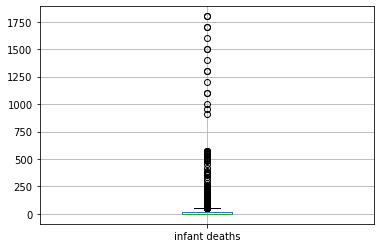

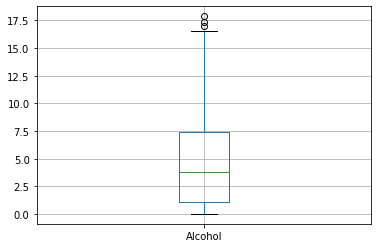

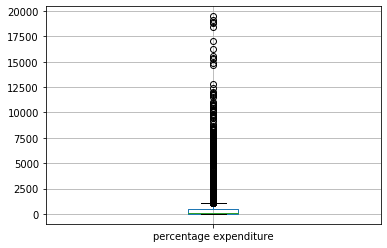

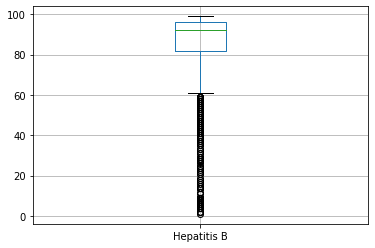

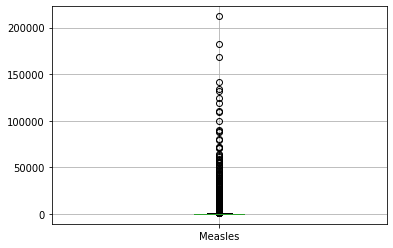

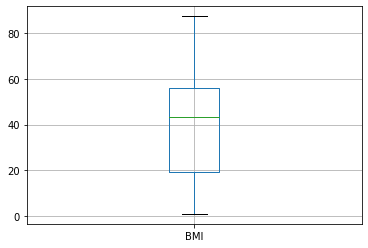

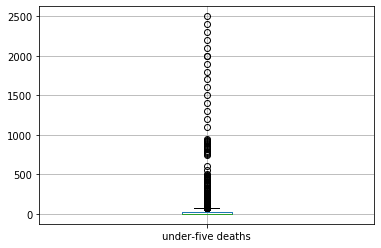

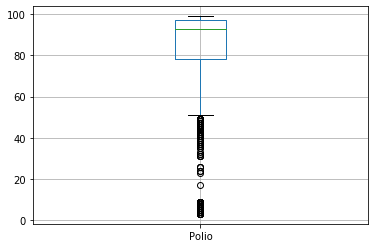

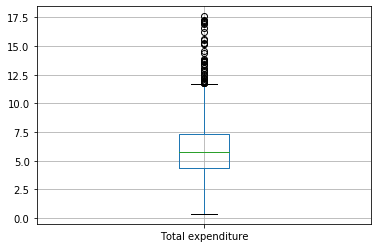

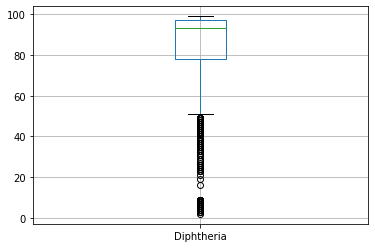

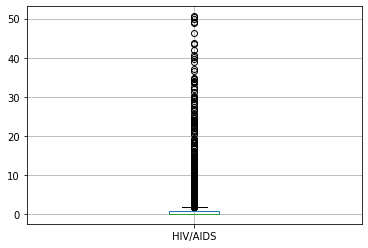

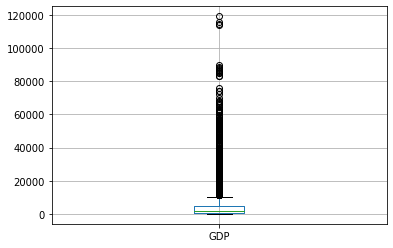

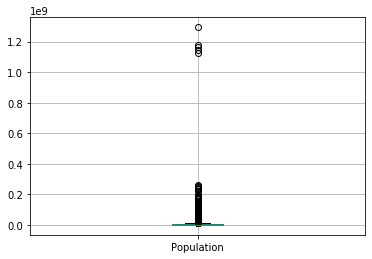

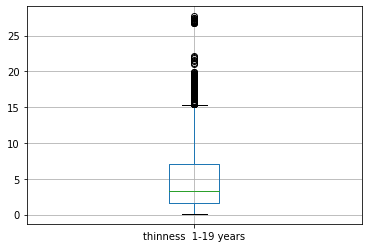

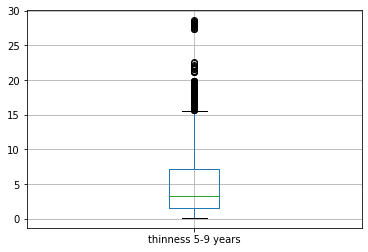

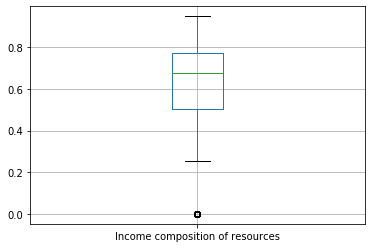

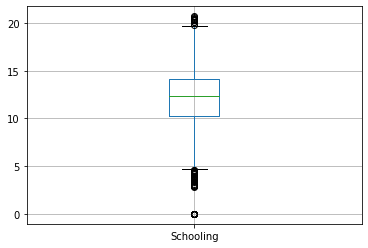

In [23]:
#checking for outliers in the data using boxplot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()


#### We will ignore country and status as it was categorical. population is having outliers so will treat it

In [24]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### Re-Indexing

In [25]:
column_names= ['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling','Life expectancy']
data=data.reindex(columns=column_names)

In [26]:
data.head()

Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0        0  2015       1            263.0             62     0.01   
1        0  2014       1            271.0             64     0.01   
2        0  2013       1            268.0             66     0.01   
3        0  2012       1            272.0             69     0.01   
4        0  2011       1            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  Life expectancy  
0       10.1             65.0  
1       10.0             59.9  
2        9.9             59.9  
3        9.8             59.5  
4        9.5             59.2

#### Just to take a over view of all features correlation with dependant variable

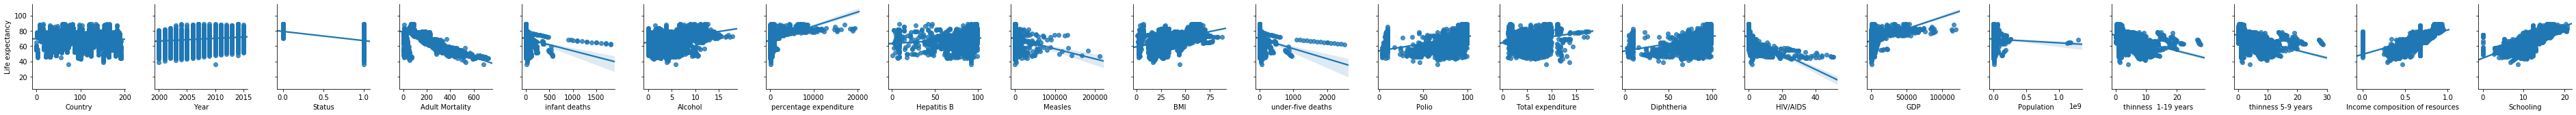

In [27]:
#ASSUMPTION 2:- ASSUMPTION OF LINEARITY : EVERY INDEPENDENT VARIABLE SHOULD HAVE
#LINEAR RELATIONSHIP WITH THE DEPENDENT VARIABLE
sns.pairplot(data,x_vars=['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],y_vars='Life expectancy',kind='reg')

#### Hepatitis B is having no correlation.


In [28]:
data.drop(columns="Country",axis=1)

Year  Status  Adult Mortality  infant deaths  Alcohol  \
0     2015       1            263.0             62    0.010   
1     2014       1            271.0             64    0.010   
2     2013       1            268.0             66    0.010   
3     2012       1            272.0             69    0.010   
4     2011       1            275.0             71    0.010   
5     2010       1            279.0             74    0.010   
6     2009       1            281.0             77    0.010   
7     2008       1            287.0             80    0.030   
8     2007       1            295.0             82    0.020   
9     2006       1            295.0             84    0.030   
10    2005       1            291.0             85    0.020   
11    2004       1            293.0             87    0.020   
12    2003       1            295.0             87    0.010   
13    2002       1              3.0             88    0.010   
14    2001       1            316.0             88    0.010   
15    2000       1            321.0             88    0.010   
16    2015       1             74.0              0    4.600   
17    2014       1              8.0              0    4.510   
18    2013       1             84.0              0    4.760   
19    2012       1             86.0              0    5.140   
20    2011       1             88.0              0    5.370   
21    2010       1             91.0              1    5.280   
22    2009       1             91.0              1    5.790   
23    2008       1              1.0              1    5.610   
24    2007       1              9.0              1    5.580   
25    2006       1             99.0              1    5.310   
26    2005       1             15.0              1    5.160   
27    2004       1             17.0              1    4.540   
28    2003       1             18.0              1    4.290   
29    2002       1             15.0              1    3.730   
...    ...     ...              ...            ...      ...   
2908  2013       1            328.0             29    2.410   
2909  2012       1            349.0             29    2.590   
2910  2011       1            366.0             29    2.570   
2911  2010       1            363.0             30    2.470   
2912  2009       1            368.0             30    2.300   
2913  2008       1             45.0             31    2.120   
2914  2007       1            487.0             32    2.080   
2915  2006       1            526.0             33    2.250   
2916  2005       1            554.0             34    2.330   
2917  2004       1            578.0             36    2.460   
2918  2003       1             64.0             39    2.330   
2919  2002       1             69.0             41    2.440   
2920  2001       1            611.0             43    2.610   
2921  2000       1            614.0             44    2.620   
2922  2015       1            336.0             22    3.755   
2923  2014       1            371.0             23    6.500   
2924  2013       1            399.0             25    6.390   
2925  2012       1            429.0             26    6.090   
2926  2011       1            464.0             28    6.000   
2927  2010       1            527.0             29    5.210   
2928  2009       1            587.0             30    4.640   
2929  2008       1            632.0             30    3.560   
2930  2007       1             67.0             29    3.880   
2931  2006       1              7.0             28    4.570   
2932  2005       1            717.0             28    4.140   
2933  2004       1            723.0             27    4.360   
2934  2003       1            715.0             26    4.060   
2935  2002       1             73.0             25    4.430   
2936  2001       1            686.0             25    1.720   
2937  2000       1            665.0             24    1.680   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0                  7

## Splitting data into X and Y.

In [29]:
#create x and y
X = data.values[:,0:-1]  #-->0 to -2
Y = data.values[:,-1]

In [30]:
print(X.shape)
print(Y.shape)

(2938, 21)
(2938,)


### Making data unitless by standardizing it

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

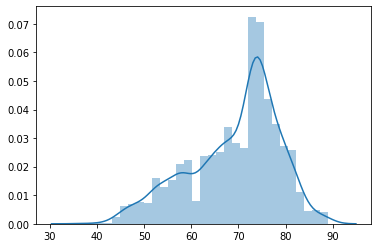

In [32]:
#assumption of normality - the dependent variable should follow on
#approximate normal distribution
sns.distplot(Y,hist=True)

In [33]:
Y_log = np.log(Y)

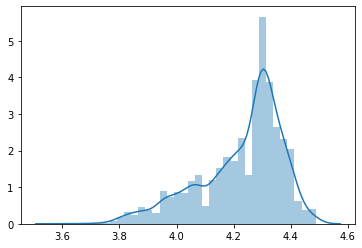

In [34]:
sns.distplot(Y_log,hist=True)

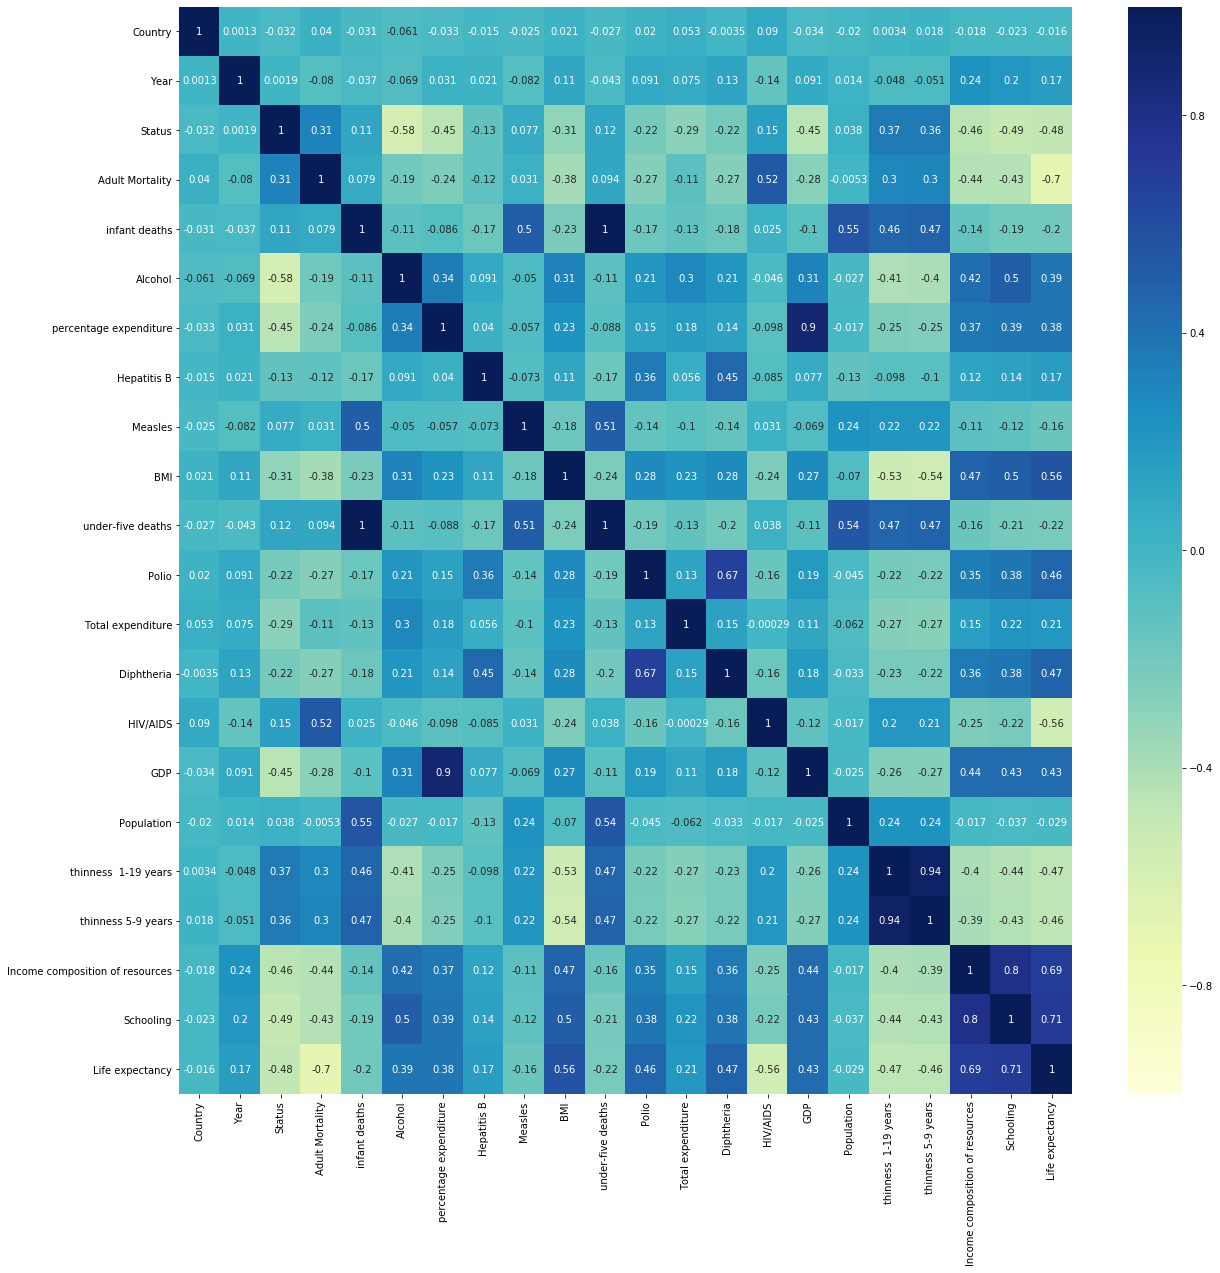

In [35]:
corr_df=data.corr()
#print(corr_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True, cmap='YlGnBu',fmt='.2g')
plt.show()

#### under five death and infant deaths have high multicollinearity.
#### GDP and percentage expenditure have high multicollinearity.
#### thinness 1-19 years and thinness 5-9 years have high ,multi-collinearity.
#### schooling and income composition of resources have high multicollinearity.

#### Still i will try keeping the features and remove it afterwards during feature selection.

### SPLITTING THE DATA into test and train.

In [36]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2350, 21)
(588, 21)
(2350,)
(588,)


###  TRYING WITH BOTH Y_LOG AND Y in linear regression.

In [38]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

69.24293041632251
[  0.28156488  -0.06188093  -0.4598843   -2.50974406  12.02606993
   0.39672688   0.02535872  -0.35248515  -0.25561475   0.86432154
 -12.21577424   0.59726573   0.16890436   0.87975643  -2.43280177
   0.66904066   0.01499559  -0.32795312  -0.01635418   1.18221544
   2.0374907 ]


In [39]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[77.88711326 55.33561221 74.70934444 80.05683675 60.01232418 79.57813259
 63.54002723 70.33323082 60.96533437 74.22755914 72.22940316 75.61929673
 70.38643018 63.267886   80.69462242 70.24602139 73.08882186 80.58131247
 73.40614873 71.63052297 72.62140387 60.17869138 76.44680859 77.7870344
 66.44823863 68.93535738 82.71780833 81.43274246 76.49773093 64.87688922
 78.02491647 81.54598217 80.37357804 61.51429944 73.22922942 79.70378923
 83.53235956 63.69451186 62.18078711 70.52956193 75.59275592 67.58599796
 67.89081045 65.88655171 72.45775888 83.50224318 77.67008487 71.56336766
 77.60318614 75.19713341 71.54371521 48.74334965 71.13608243 78.10579316
 82.95220683 74.27412005 68.61176154 61.75311387 64.86184202 61.70652579
 49.28026749 73.87712656 68.21262374 60.62235951 76.96959118 67.22289623
 70.93126378 62.18369711 76.03557563 78.61128232 77.051718   68.13388963
 50.72382781 51.65639753 72.8303592  71.96331592 62.62596265 63.13429457
 70.23371834 66.5831604  78.44493664 72.21627739 69.

In [40]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8275855586665444
RMSE: 3.9258531087380706
Adj R-square: 0.8263438908791635


#### R-square with y_log - 0.8270%
#### R-square with y - 0.8275%

In [41]:
lm.score(X_train, Y_train)

0.8182296643488808

#### USING REGULARIZATION

In [42]:
from sklearn.linear_model import Ridge
#create a model object
lm = Ridge()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

69.24392213774237
[ 2.74609852e-01 -6.57717289e-02 -4.59456567e-01 -2.51622295e+00
  1.04836832e+01  3.74331385e-01  3.19282809e-02 -3.61214723e-01
 -2.61040931e-01  8.67314387e-01 -1.06720470e+01  6.08349888e-01
  1.70415268e-01  9.02680708e-01 -2.43910161e+00  6.56336033e-01
  3.38978826e-02 -3.37261818e-01 -6.53044038e-04  1.20241335e+00
  2.04386943e+00]


In [43]:
Y_pred=lm.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8275413508145283
RMSE: 3.926356379834075
Adj R-square: 0.8262993646578428


#### Y_LOG - 0.8269
#### Y     - 0.8275

In [45]:
from sklearn.linear_model import Lasso
#create a model object
lm = Lasso()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

69.26781777113322
[ 0.          0.         -0.2540011  -2.43483982 -0.          0.
  0.          0.         -0.          0.6984635  -0.          0.27797111
  0.          0.57694741 -1.82611301  0.17351602 -0.         -0.12733856
 -0.          1.28953039  2.29164659]


In [46]:
Y_pred=lm.predict(X_test)

In [47]:

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7751199735024044
RMSE: 4.483556718369893
Adj R-square: 0.7735004671387385


#### Y_LOG= -0.0011%
#### Y -0.775%

### K-NEAREST NEIGHBORS

In [48]:
#predicting using the KNeighbors_classifier
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor(n_neighbors=54, metric= "manhattan")
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(81.0, 78.18333333333334), (58.8, 57.67962962962964), (75.8, 74.13148148148149), (79.3, 77.98518518518516), (61.4, 58.455555555555556), (79.4, 79.41296296296295), (62.5, 61.038888888888884), (75.0, 73.20185185185186), (51.6, 57.60185185185183), (73.8, 73.71296296296296), (73.8, 73.68888888888888), (78.0, 76.21296296296296), (72.7, 72.51296296296297), (55.0, 59.1425925925926), (82.3, 81.28888888888889), (68.0, 70.05925925925925), (73.3, 73.17222222222222), (79.2, 79.62037037037037), (71.0, 74.14074074074072), (73.9, 73.95555555555555), (82.0, 73.88703703703703), (57.1, 59.77962962962964), (83.5, 79.57407407407408), (79.6, 78.52222222222223), (69.1, 70.62037037037037), (68.1, 68.80185185185185), (82.0, 81.22592592592592), (89.0, 81.59074074074073), (76.9, 75.78333333333333), (65.2, 63.079629629629636), (75.5, 76.17222222222223), (77.5, 78.3574074074074), (89.0, 80.76481481481481), (53.1, 57.91851851851852), (87.0, 74.80740740740741), (78.9, 78.07407407407408), (81.7, 82.1148148148148), 

In [49]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8799985713520475
RMSE: 3.2752196765226698
Adj R-square: 0.8791343635325664


### SUPPORT VECTOR MACHINE

In [50]:
from sklearn.svm import SVR
svr_model=SVR(C=1,gamma=0.001)
svr_model.fit(X_train, Y_train)
Y_pred=svr_model.predict(X_test)
print(list(Y_pred))

[77.56376807387193, 58.483496271962096, 73.94068269079312, 78.29824114509368, 62.75379966281769, 78.13066058339903, 63.75500362852175, 70.96003041126025, 63.41842261468858, 73.48947904156365, 70.6487235471138, 75.65498339001564, 71.02254391850826, 65.08191103585548, 78.97490824030736, 70.57810355998465, 72.97006023600761, 78.51255812565688, 73.14908290734411, 71.54377550618386, 72.90947576554579, 63.14911517528325, 75.91660985444408, 76.5818215580577, 66.54621895031956, 68.91145258979576, 81.32017248170652, 80.76888250523449, 75.60476243333837, 65.6365804508354, 77.38653657868076, 79.37194911786368, 78.76704614669993, 64.30491133037278, 73.012487219931, 78.00340605709867, 81.61259312773134, 65.41810195293198, 64.85370158564056, 70.3295685420865, 73.70344667686086, 63.87016753414789, 66.94490553423324, 67.33083886516279, 71.98013390807301, 81.77351658504558, 76.48439652240585, 70.2230091402266, 76.75051749835018, 74.54973153109682, 71.39284471344193, 56.59664447055404, 71.74177424663237

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7458412004294228
RMSE: 4.766502240466219
Adj R-square: 0.7440108387041203


# DECISION TREE REGRESSOR

In [52]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(random_state=10,splitter='best',min_samples_leaf= 3,min_samples_split = 5, max_depth = 10)

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [53]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.919660469459916
RMSE: 2.679858547464292
Adj R-square: 0.9190818925938866


# RANDOM FOREST REGRESSOR

In [54]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor(n_estimators=50,random_state=10)

model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9640344157722031
RMSE: 1.793043335048137
Adj R-square: 0.9637754043631551


# ADABOOST REGRESSOR

In [56]:
#predicting using the AdaBoost_Regressor
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost=AdaBoostRegressor(base_estimator=
                                  DecisionTreeRegressor(random_state=10),
                                  n_estimators=110,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [57]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9680601879724735
RMSE: 1.689714784933176
Adj R-square: 0.967830168750053


# GRADIENT BOOSTING CLASSIFIER

In [58]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingRegressor

model_gradient=GradientBoostingRegressor(
                                  n_estimators=300,
                                  random_state=50)
#fit the model on the data and predict the values
model_gradient.fit(X_train,Y_train)
Y_pred=model_gradient.predict(X_test)

In [59]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9594595549087399
RMSE: 1.9036691958462528
Adj R-square: 0.9591675969708399


#### FEATURE SELECTION

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(model_AdaBoost,n_features_to_select=10)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
#rint("Selected Features: ") 
#rint(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Num Features:  10
Feature Ranking:  [ 1  1 12  1  3  2  8 11  7  1  1  4  1 10  1  9  5  6  1  1  1]


In [61]:
Y_pred=model_rfe.predict(X_test)

In [62]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.968055812186644
RMSE: 1.6898305272672622
Adj R-square: 0.9678257614513627


#### AFTER SELECTING 10 VARIABLES R-SQUARE  WAS SLIPPING MORE ( 0.966 %) SO I DECIDED GO WITH 11 VARIABLES WITH ADABOOST.

In [63]:
!pip install pickle

  ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [64]:
import pickle

In [65]:
#save the model to disk
filename = r'adaboost_model.sav'
pickle.dump(model_rfe, open(filename,'wb'))
#write in byte

In [66]:
#load the model from disk
loaded_model = pickle.load(open(filename,'rb'))
Y_pred=loaded_model.predict(X_test)
Y_pred
#rb=readmode

array([81. , 58.1, 76. , 79.3, 61.6, 79.2, 62.2, 74.7, 51.5, 73.9, 74.5,
       77.8, 72.6, 54.3, 81.9, 67.5, 73.5, 79.9, 69.9, 73.9, 81.7, 57.7,
       83.3, 79.5, 68.7, 67.9, 79.8, 87. , 76.7, 65.5, 75.6, 78.3, 84. ,
       53.1, 86. , 78.3, 81.7, 62.9, 51. , 72.3, 73.5, 66.6, 66.8, 64.2,
       72.4, 83. , 79.7, 72.5, 82.9, 74.4, 72.6, 52. , 71.2, 82. , 81.6,
       71. , 66.2, 61.4, 68.1, 58.2, 56.6, 74.1, 62.4, 53.8, 84. , 67.2,
       73.9, 58.6, 73.7, 83. , 75.4, 69.7, 52.3, 53.2, 73.9, 73.9, 63. ,
       62. , 71.5, 64.3, 77.3, 76.2, 70. , 72.1, 56. , 67.2, 75.5, 48. ,
       74.6, 71.7, 65.8, 52.8, 73. , 69.6, 73.5, 61. , 59.1, 59.6, 79.9,
       62.3, 74. , 67.2, 73.8, 58.6, 79.7, 73.3, 67. , 64. , 68.1, 68.3,
       71.4, 73.6, 59.5, 75.6, 65. , 74. , 66.7, 52.1, 57.4, 76.4, 74.5,
       75.4, 59.8, 74.6, 58.1, 74.1, 80. , 79.6, 58.1, 73.6, 70. , 75.3,
       48.9, 73.5, 75.9, 78.7, 75.4, 69. , 56.7, 55.3, 73. , 75.8, 62.2,
       55. , 73.4, 63.7, 44.5, 81. , 69.8, 63. , 73

# MODEL COMPARISION

LINEAR REGRESSION:- 82.6% (WITH RIDGE)

KNN:- 87.9% (WITH 54 NEIGHBOURS)

SVM:- 74%

DECISION TREE:-91.9%

RANDOM FOREST:- 96.3%

GRADIENT BOOSTING:- 95.9%

ADABOOST:- 96.7%

RFE USING ADABOOST(10 VARIABLES):- 96.7%

### Conclusion

The model shows 96.6% accuracy from the different features provided so we can use it for life expectancy prediction.

One can extend his/her life span by adopting a healthy life-style, proper education, and by getting vaccinated. Ofcourse Demographic location plays an important role. In our analysis, we saw people living in Europe has a higher life-span as compared to other continents. Country's GDP and Income composition affects the Life Expectancy in a broader way.

There are some parameters like pollution and environmental index that has been missing in this analysis and expected to be highly related with Life Expectancy.

Getting Vaccinated for various diseases also increases the expected life span. Consumption of Alcohol and Life expectancy has an unexpected positive relation except for Africa.